In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [274]:
df = pd.read_csv('disney_movies.csv')

In [275]:
df.head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


## DATA CLEANING

In [276]:
df.dtypes

movie_title                 object
release_date                object
genre                       object
mpaa_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
dtype: object

### Numerical Values

In [277]:
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [278]:
df.shape[0] - df.dropna().shape[0]

66

In [279]:
len(df)

579

In [280]:
df.inflation_adjusted_gross.isnull().values.ravel().sum()

0

In [281]:
df.total_gross.isnull().values.ravel().sum()

0

In [282]:
df[df.total_gross == 0]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0
27,Amy,1981-03-20,Drama,NaN,0,0
29,Condorman,1981-08-07,Action,NaN,0,0
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0


In [283]:
df.loc[20]

movie_title                 The Many Adventures of Winnie the Pooh
release_date                                            1977-03-11
genre                                                          NaN
mpaa_rating                                                    NaN
total_gross                                                      0
inflation_adjusted_gross                                         0
Name: 20, dtype: object

In [284]:
#dropping these rows as they do not have any substantial gross values
df = df.drop(df.index[[20,27, 29, 355]]).reset_index(drop=True)

### Catergoical Columns

In [285]:
df.mpaa_rating.isnull().values.ravel().sum()

52

In [286]:
df['mpaa_rating'] = df['mpaa_rating'].fillna('Unknown')

In [287]:
df.mpaa_rating.isnull().values.ravel().sum()

0

In [288]:
df.genre.isnull().values.ravel().sum()

15

In [289]:
genre_name = list(df.genre.unique())
genre_name

['Musical',
 'Adventure',
 'Drama',
 'Comedy',
 nan,
 'Action',
 'Horror',
 'Romantic Comedy',
 'Thriller/Suspense',
 'Western',
 'Black Comedy',
 'Documentary',
 'Concert/Performance']

In [290]:
df['genre'] = df['genre'].fillna('Unknown')

In [291]:
genre_name = list(df.genre.unique())
genre_name

['Musical',
 'Adventure',
 'Drama',
 'Comedy',
 'Unknown',
 'Action',
 'Horror',
 'Romantic Comedy',
 'Thriller/Suspense',
 'Western',
 'Black Comedy',
 'Documentary',
 'Concert/Performance']

In [292]:
df.genre.isnull().values.ravel().sum()

0

In [293]:
df.release_date.isnull().values.ravel().sum()

0

In [294]:
df['release_year'] = df['release_date'].str[:4]

In [295]:
df["release_year"] = df["release_year"].apply(pd.to_numeric)

In [296]:
df = df.drop(['release_date'], axis=1)

In [297]:
df = df[df['release_year'] >= 1980]  

In [298]:
df = df.reset_index(drop=True)
df

,movie_title,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Midnight Madness,Unknown,Unknown,2900000,9088096,1980
1,The Last Flight of Noah’s Ark,Unknown,Unknown,11000000,34472116,1980
2,The Devil and Max Devlin,Unknown,Unknown,16000000,48517980,1981
3,The Fox and the Hound,Comedy,Unknown,43899231,133118889,1981
4,Night Crossing,Drama,Unknown,4500000,12903059,1982
...,...,...,...,...,...,...
547,The Light Between Oceans,Drama,PG-13,12545979,12545979,2016
548,Queen of Katwe,Drama,PG,8874389,8874389,2016
549,Doctor Strange,Adventure,PG-13,232532923,232532923,2016
550,Moana,Adventure,PG,246082029,246082029,2016


## VISUALIZATIONS

In [299]:
df1 = df
df1['inflation_adjusted_gross'] = df1['inflation_adjusted_gross']/1000000
df1

,movie_title,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Midnight Madness,Unknown,Unknown,2900000,9.088096,1980
1,The Last Flight of Noah’s Ark,Unknown,Unknown,11000000,34.472116,1980
2,The Devil and Max Devlin,Unknown,Unknown,16000000,48.517980,1981
3,The Fox and the Hound,Comedy,Unknown,43899231,133.118889,1981
4,Night Crossing,Drama,Unknown,4500000,12.903059,1982
...,...,...,...,...,...,...
547,The Light Between Oceans,Drama,PG-13,12545979,12.545979,2016
548,Queen of Katwe,Drama,PG,8874389,8.874389,2016
549,Doctor Strange,Adventure,PG-13,232532923,232.532923,2016
550,Moana,Adventure,PG,246082029,246.082029,2016


In [328]:
line = alt.Chart(df1).mark_line(color='purple').encode(
        alt.X('release_year:N', axis=alt.Axis(title= "Year",
                                             tickCount=12, grid=False, 
                                              values=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
                                              labelAngle=-45), 
              scale=alt.Scale(zero=False)),
        alt.Y('mean(inflation_adjusted_gross):Q', axis=alt.Axis(title="Inflation Adjusted Gross Income (millions)"), 
                                           scale=alt.Scale(zero=False))
)

band = alt.Chart(df1).mark_errorband(extent='ci', color='purple').encode(
        alt.X('release_year:N', axis=alt.Axis(title= "Year",
                                             tickCount=12, grid=False, 
                                              values=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], 
                                              labelAngle=-45), 
              scale=alt.Scale(zero=False)),
        alt.Y('mean(inflation_adjusted_gross):Q', axis=alt.Axis(title="Inflation Adjusted Gross Income (millions)"), 
                                           scale=alt.Scale(zero=False)))

alt.layer(line, band).configure_view(
    stroke='transparent'
).configure_axis(labelFontSize=15,
                 titleFontSize=18
                 ).configure_title(fontSize=20
                                  ).configure_legend(titleFontSize=15, labelFontSize=13
).properties(title='Mean Inflation Adjusted Gross Incomes of Disney Movies by Year', height=500, width=700)

alt.LayerChart(...)

Text(0.5, 1.0, 'Number of Disney Movies Released Each Year')

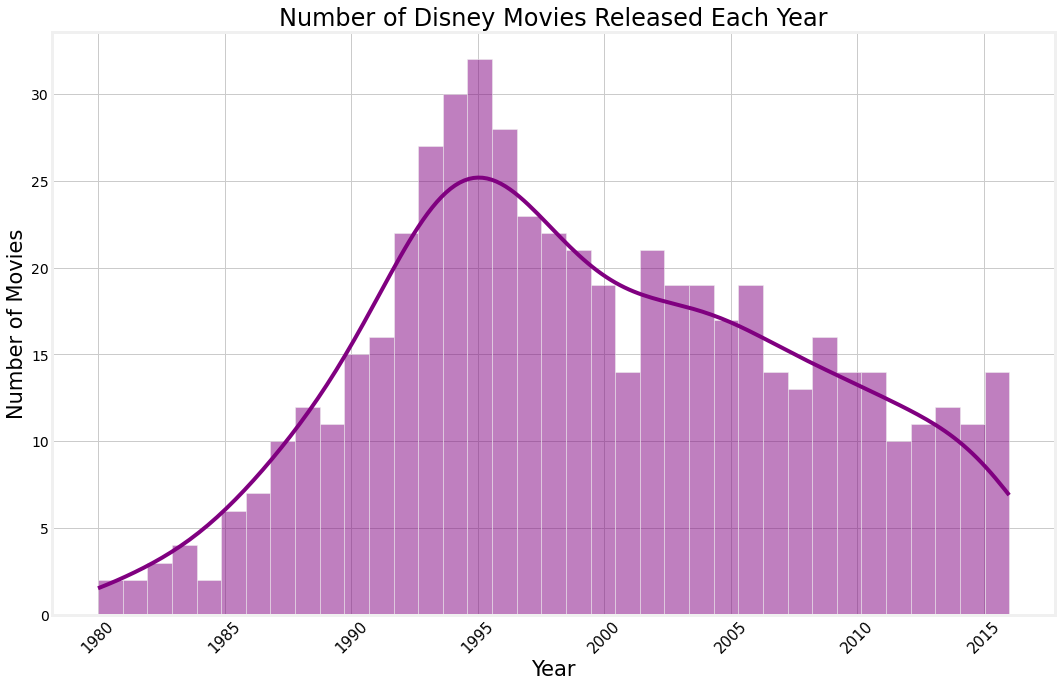

In [330]:
plt.figure(figsize=(16,10), facecolor='white')
plt.xticks(rotation=45, fontsize=15)
ax = sns.histplot(df['release_year'],kde=True, bins=37,  color='purple')
ax.set_facecolor("white")
plt.xlabel("Year", fontsize=21)
plt.ylabel("Number of Movies", fontsize=21)
plt.title("Number of Disney Movies Released Each Year", fontsize=24)

Text(0.5, 1.0, 'Count Distribution of Disney Movie Genres by Year')

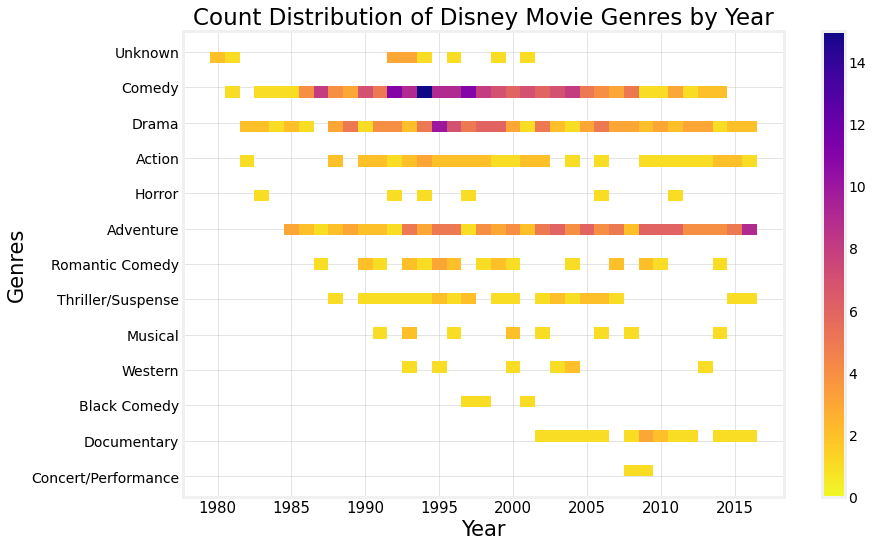

In [419]:
plt.figure(figsize=(12,8), facecolor='white')
plt.xticks( fontsize=15)
ax = sns.histplot(
    df, x="release_year", y="genre",
    bins=37, discrete=(True, False),
    cbar=True, cmap="plasma_r"
)
ax.set_facecolor("white")
ax.grid(which='major', linestyle='-', linewidth='0.5')
plt.xlabel("Year", fontsize=21)
plt.ylabel("Genres", fontsize=21)
plt.title("Count Distribution of Disney Movie Genres by Year", fontsize=23)

In [402]:
some_values = ['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller/Suspense']
df2 = df1.loc[df['genre'].isin(some_values)]
df3 = df2.sort_values(by='inflation_adjusted_gross', ascending=False).reset_index(drop=True).head(150)
df3

,movie_title,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Star Wars Ep. VII: The Force Awakens,Adventure,PG-13,936662225,936.662225,2015
1,The Lion King,Adventure,G,422780140,761.640898,1994
2,The Avengers,Action,PG-13,623279547,660.081224,2012
3,Pirates of the Caribbean: Dead Man’…,Adventure,PG-13,423315812,544.817142,2006
4,Rogue One: A Star Wars Story,Adventure,PG-13,529483936,529.483936,2016
...,...,...,...,...,...,...
145,Oliver & Company,Adventure,G,49576671,102.254492,1988
146,Ladder 49,Action,PG-13,74541707,101.161045,2004
147,Bridge to Terabithia,Drama,PG,82234139,100.760721,2007
148,Up Close & Personal,Drama,PG-13,51045801,97.356578,1996


In [403]:
alt.Chart(df3).mark_point(filled=True, opacity=0.5, size=200 ).encode(
        alt.X('release_year:N', axis=alt.Axis(title= "Year", 
                                              values=[1986, 1990, 1995, 2000, 2005, 2010, 2016],
                                              labelAngle=0), 
              scale=alt.Scale(zero=False)),
        alt.Y('inflation_adjusted_gross:Q', axis=alt.Axis(title="Inflation Adjusted Gross Income (millions)"), 
              scale=alt.Scale(zero=False)),
        alt.Color('genre:N'),
    tooltip = [
        alt.Tooltip("movie_title:N")]
).configure_axis(labelFontSize=15,
                 titleFontSize=18
                 ).configure_title(fontSize=20
                                  ).configure_legend(titleFontSize=15, labelFontSize=13
).properties(title='Disney Movies with Top 150 Gross Income by Genre', width=750, height=400)

alt.Chart(...)